In [ ]:


from itertools import product
import numpy as np
#from sklearn import datasets
#from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
#from ripser import Rips
# !pip install persim
from persim import PersistenceImager

Printing a PersistenceImager() object will print its defining attributes

`PersistenceImager()` attributes can be adjusted at or after instantiation.
Updating attributes of a `PersistenceImager()` object will automatically update all other dependent attributes.

In [ ]:
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to accomodate the specified pixel size.

In [ ]:
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5, 0.8], [0.7, 2.2], [2.5, 4.0]]),
         np.array([[0.1, 0.2], [3.1, 3.3], [1.6, 2.9]]),
         np.array([[0.2, 1.5], [0.4, 0.6], [0.2, 2.6]])]
pimgr.fit(pdgms, skew=True)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


The `transform()` method can then be called on one or more (*,2) numpy arrays to generate persistence images from diagrams.

The option `skew=True` specifies that the diagrams are currently in birth-death coordinates and must first be transformed to birth-persistence coordinates.

In [ ]:
pimgs = pimgr.transform(pdgms, skew=True)

The `plot_diagram()` and `plot_image()` methods can be used to visualize persistence diagrams and images

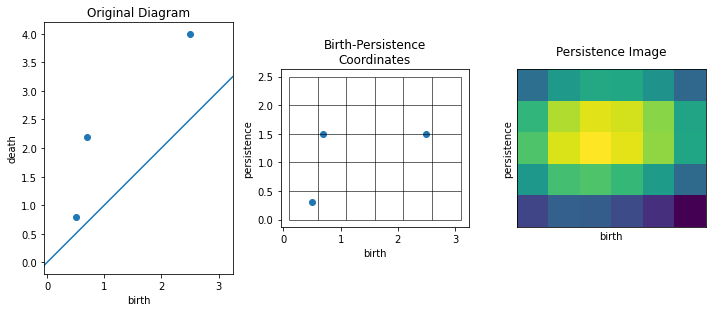

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0], skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0], skew=True, ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0], ax=axs[2])

plt.tight_layout()

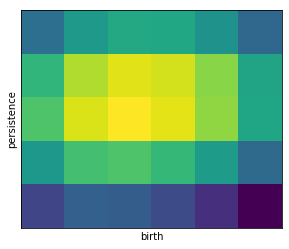

In [ ]:
pimgr.plot_image(pimgs[0])